In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
# Load the CSV file
df = pd.read_csv('mushroom.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [ ]:
df.describe(include='object')

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


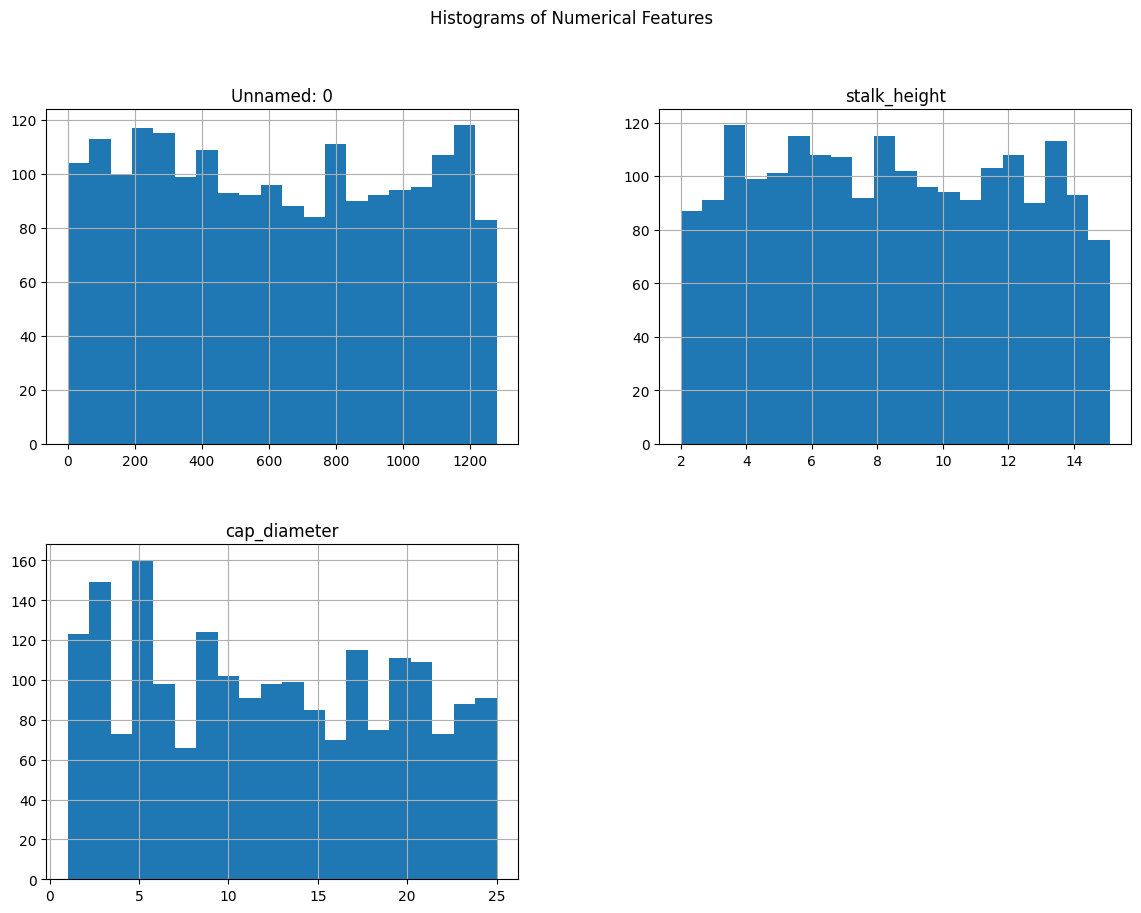

In [ ]:
# Histograms for numerical data
df.hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

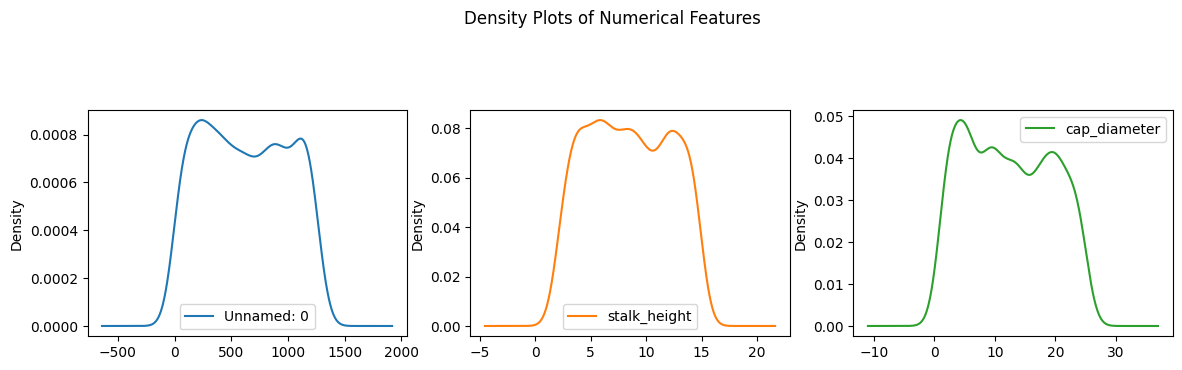

In [ ]:
# Density plots for numerical data
df.select_dtypes(include='number').plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(14, 10))
plt.suptitle('Density Plots of Numerical Features')
plt.show()

<ipython-input-14-397bd4019e71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')
<ipython-input-14-397bd4019e71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')
<ipython-input-14-397bd4019e71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')
<ipython-input-14-397bd4019e71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

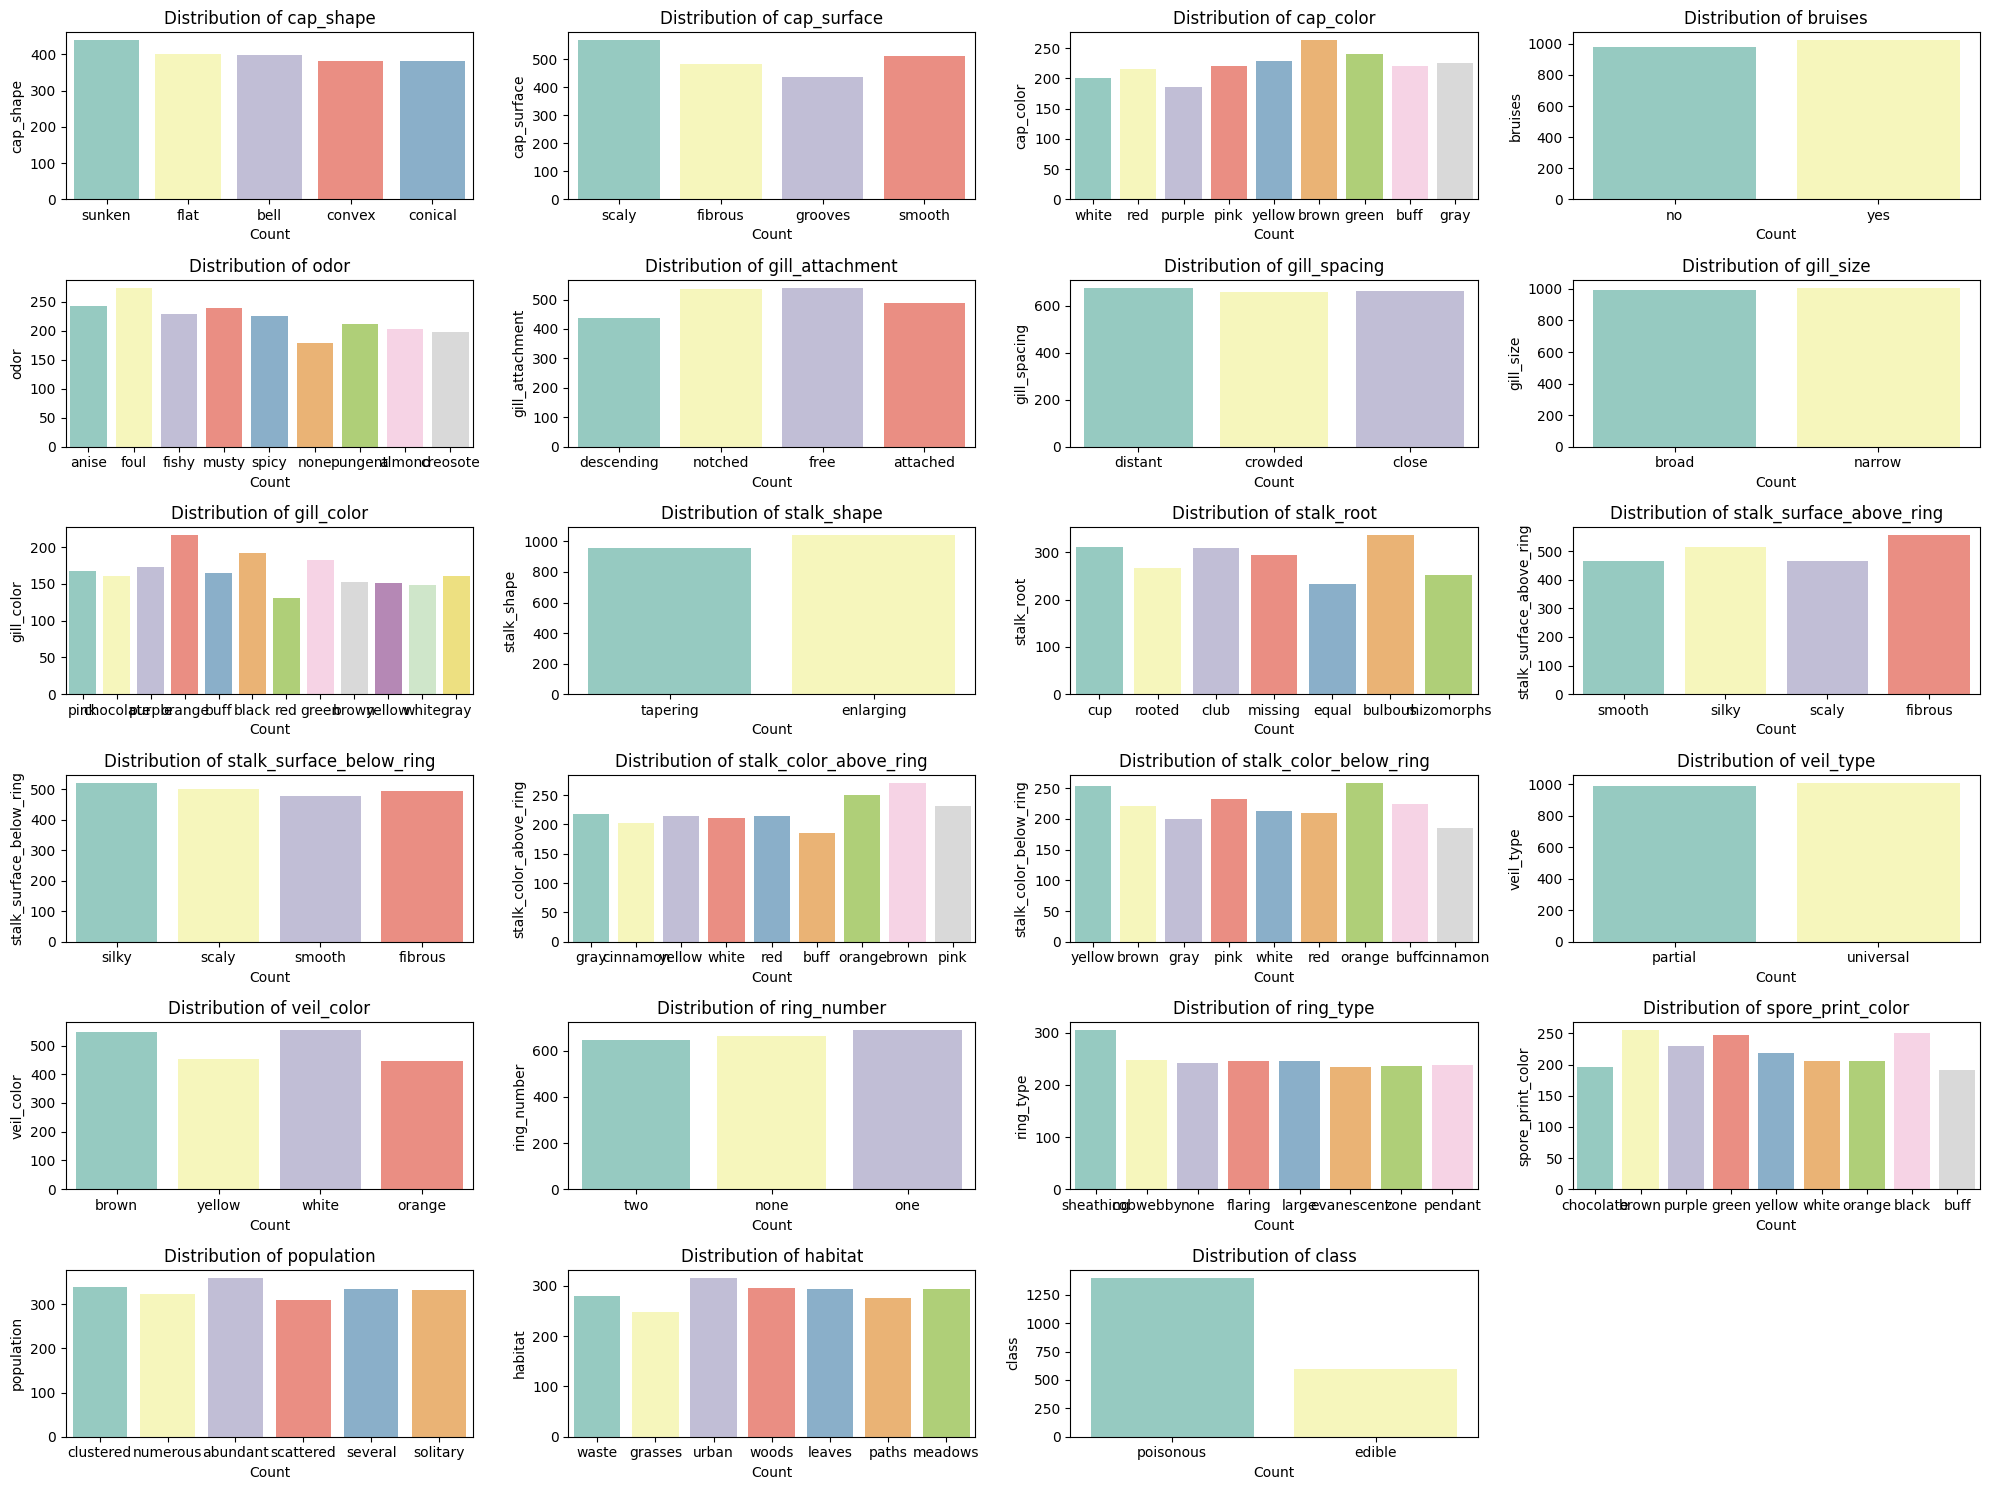

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Set the size of the plots
plt.figure(figsize=(20, 15))

# Generate bar plots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 3) // 4, 4, i + 1)
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Calculate Cramér's V for each pair of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)


In [ ]:
import numpy as np
for col1 in categorical_cols:
    for col2 in categorical_cols:
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the matrix to float type for visualization
cramers_v_matrix = cramers_v_matrix.astype(float)


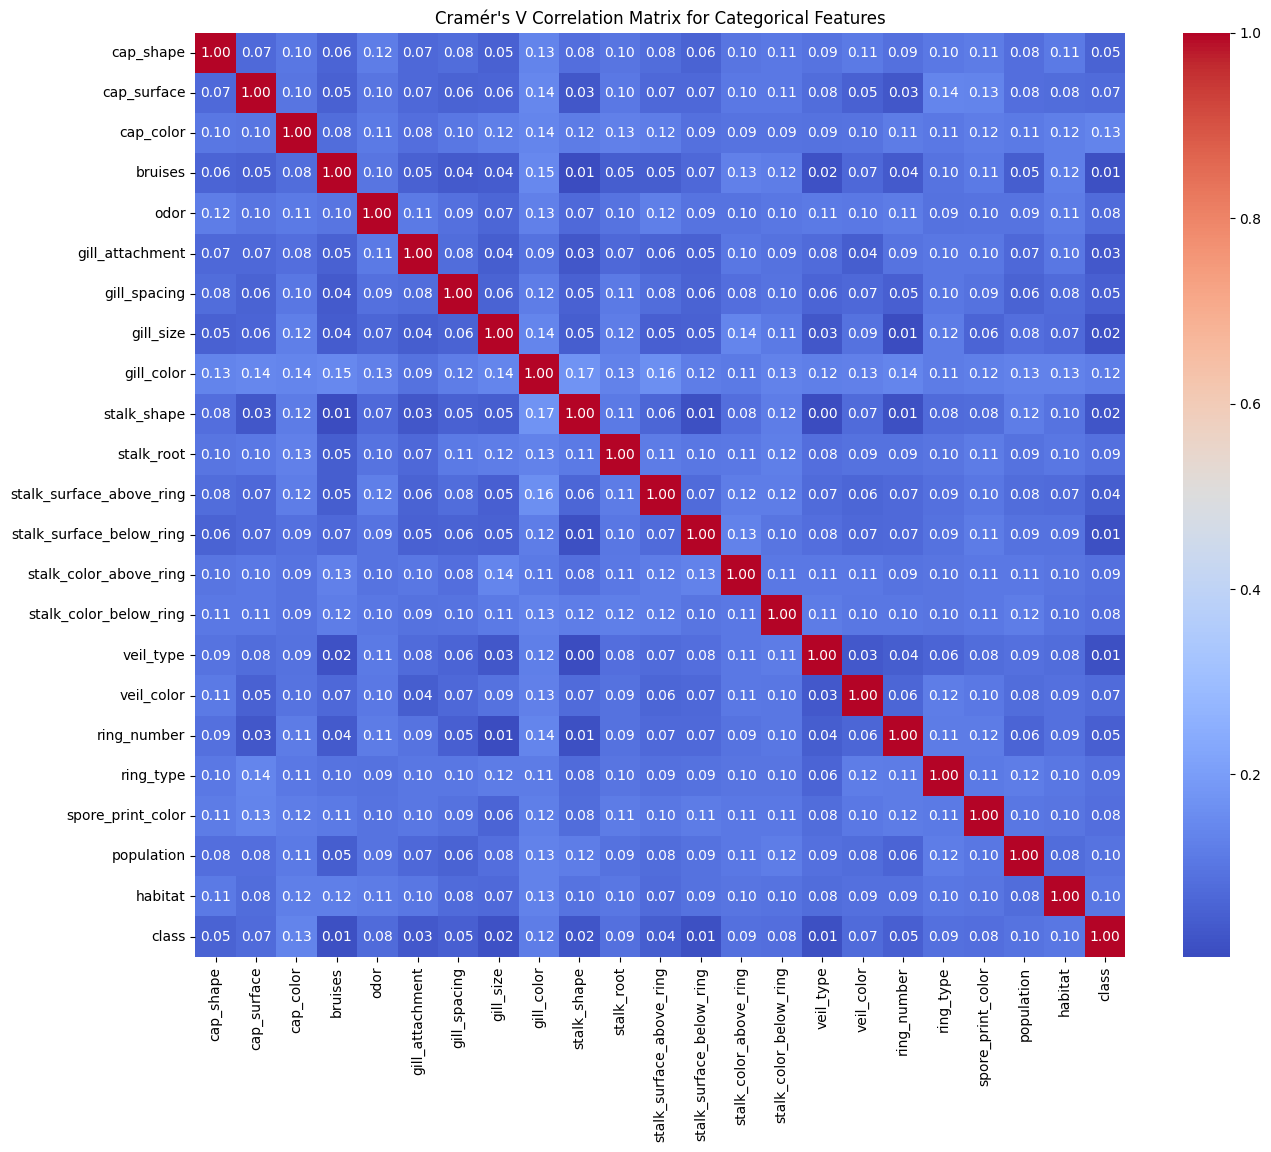

In [ ]:
# Visualize the Cramér's V matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1600, 25)
X_test shape: (400, 25)
y_train shape: (1600,)
y_test shape: (400,)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Evaluate model performance on the testing data
y_pred = svm_model.predict(X_test)


In [6]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-score: 0.8006

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the results
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-8-0727bdfefb89>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[y_test != y_pred, 0], X_test_pca[y_test != y_pred, 1],


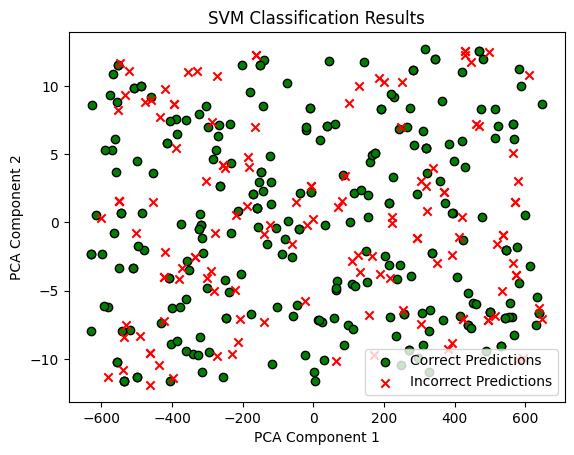

In [8]:
# Scatter plot for correct predictions
plt.scatter(X_test_pca[y_test == y_pred, 0], X_test_pca[y_test == y_pred, 1],
            c='green', marker='o', edgecolor='k', label='Correct Predictions')

# Scatter plot for incorrect predictions
plt.scatter(X_test_pca[y_test != y_pred, 0], X_test_pca[y_test != y_pred, 1],
            c='red', marker='x', edgecolor='k', label='Incorrect Predictions')

plt.title('SVM Classification Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [9]:
# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Simplified C values
    'kernel': ['linear', 'rbf'],  # Focus on linear and rbf kernels
    'gamma': ['scale', 'auto']  # Keeping gamma options
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,  # 3-fold CV
    scoring='f1',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................C=10, gamma=auto, kernel=linear; total time= 3.9min
[CV] END ....................C=10, gamma=auto, kernel=linear; total time= 4.4min
[CV] END ....................C=10, gamma=auto, kernel=linear; total time= 2.1min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.2min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 3.7min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 4.5min
[CV] END ...................C=10, gamma=scale, k

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='f1', verbose=2)

In [10]:
# Best parameters and score after tuning
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score:.4f}")


Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Best F1 Score: 0.8974


In [11]:
# Compare SVM performance with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)


In [16]:
    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Print comparison results for different kernels
for kernel, metrics in results.items():
      print(f"\nKernel: {kernel}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Kernel: sigmoid
Accuracy: 0.5975
Precision: 0.6866
Recall: 0.7303
F1-Score: 0.7078


The SVM model achieved an accuracy of 66.75% with a precision of 66.75% and a perfect recall of 100% for classifying the target class. However, the model struggled with class imbalance, as evidenced by a precision of 0.00 for class 0. The best hyperparameters found were kernel='rbf', gamma='auto', and C=10, which yielded a higher F1-score of 0.8974 during tuning. The sigmoid kernel performed poorly with an accuracy of 59.75% and an F1-score of 0.7078, indicating that the RBF kernel was more effective for this dataset.

Strengths -
Effective with Non-Linear Data: The SVM model with an RBF kernel performed well, indicating that it effectively handled non-linear relationships within the dataset. This is crucial in the Mushroom dataset, where the relationship between features and the target class (edible vs. poisonous) is likely non-linear.

High Recall: The model achieved a perfect recall (100%) for the positive class (poisonous), meaning it successfully identified all poisonous mushrooms. This is particularly important in this context, as failing to identify a poisonous mushroom could have severe consequences.

Robust to Outliers: SVM is generally robust to outliers, which can be beneficial in datasets with noisy data. This robustness likely contributed to the model's ability to classify the majority of poisonous mushrooms correctly.

Weakness -
Imbalance in Class Predictions: The model struggled with class imbalance, as evidenced by the poor precision (0.00) for the negative class (edible). This indicates that while the model was very good at identifying poisonous mushrooms, it frequently misclassified edible ones as poisonous.

Limited Interpretability: SVM models, especially with non-linear kernels like RBF, are often less interpretable compared to simpler models like decision trees. This can be a drawback if understanding the decision-making process is important, for instance, when identifying which features are most important in distinguishing between edible and poisonous mushrooms.

Computational Cost: SVM, particularly with RBF or polynomial kernels, can be computationally expensive, especially with larger datasets or when tuning hyperparameters. This was evidenced by the time-consuming hyperparameter tuning process, even with optimizations.

Overfitting Risk: The high recall and relatively lower precision suggest a potential risk of overfitting, where the model becomes too tailored to the training data, especially when using a complex kernel like RBF. This can lead to poorer generalization to new data.


 The visualization showed that incorrect predictions were concentrated in certain areas of the feature space, indicating that the model may struggle with specific types of mushrooms, possibly those with features that overlap significantly between the edible and poisonous classes.

The PCA visualization revealed that while SVM was effective in separating some groups of mushrooms, there were still significant overlaps in the projected 2D space, which might explain the misclassifications.

SVM is a powerful tool for real-world classification tasks, particularly when the data is non-linear and requires robust performance in separating classes. It is highly effective in situations where the cost of misclassification is high, such as in medical diagnosis or fraud detection, because of its strong ability to maximize the margin between classes. However, SVM can be computationally intensive, especially with large datasets or when using complex kernels, which might limit its scalability. Its lack of interpretability can be a drawback in fields where understanding the decision process is crucial.